# Champion Analysis: Thresh

In [1]:
from unicodedata import normalize
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from Champions import (
    ChampionWikia,
    ChampionAbility as Ability
)

In [2]:
CHAMPION_NAME = 'Thresh'

In [3]:
CHAMPION = ChampionWikia(CHAMPION_NAME)
CHAMPION.get()

200

In [4]:
html = bs(CHAMPION.html, 'html.parser')

In [5]:
#Base Stats

for key, value in CHAMPION.base_stats.items():
    if html.find('span', id=key) is not None:
        CHAMPION.base_stats[key] = float(html.find('span', id=key).string)
        print(f'{key} --> {CHAMPION.base_stats[key]}')

for key, value in CHAMPION.base_stats_lvl.items():
    if html.find('span', id=key) is not None:
        CHAMPION.base_stats[key] = float(html.find('span', id=key).string)
        print(f'{key} --> {CHAMPION.base_stats[key]}')

Health_Thresh --> 561.0
HealthRegen_Thresh --> 7.0
ResourceBar_Thresh --> 274.0
ResourceRegen_Thresh --> 6.0
Armor_Thresh --> 28.0
AttackDamage_Thresh --> 56.0
MagicResist_Thresh --> 30.0
MovementSpeed_Thresh --> 335.0
AttackRange_Thresh --> 450.0
Health_Thresh_lvl --> 93.0
HealthRegen_Thresh_lvl --> 0.55
ResourceBar_Thresh_lvl --> 44.0
ResourceRegen_Thresh_lvl --> 0.8
Armor_Thresh_lvl --> 0.0
AttackDamage_Thresh_lvl --> 2.2
MagicResist_Thresh_lvl --> 0.5


# Abilities Cost Usage

## Q: Death Sentence

In [6]:
skill_q = Ability(ability_name='Death Sentence')

In [7]:
skill_q_table1 = html.find('div', {'class': 'skill_q'}).table
skill_q_table2 = skill_q_table1.next_sibling

In [8]:
# Skill Q Base Damage
skill_q_damage = skill_q_table2.find('dd').get_text().split('(')
skill_q.base_damage = list(map(int, skill_q_damage[0].split('/')))
print(f'{ skill_q.base_damage = }')

# Skill Q Base Damage Type
skill_q.base_damage_type = skill_q_table2.find('dt').get_text().strip(':')
print(f'{ skill_q.base_damage_type = }')

# Skill Q Scale Damage
skill_q.scale_damage = int("".join(
    filter(str.isdigit, normalize('NFKD', skill_q_damage[1]))
))
print(f'{ skill_q.scale_damage = }')

# Skill Q Scale Damage Attribute
skill_q.scale_damage_attr = skill_q_damage[1].replace(str(skill_q.scale_damage), '').split(' ')[1]
print(f'{ skill_q.scale_damage_attr = }')

# Skill Q Mana Cost
skill_q_table1_text = list(skill_q_table1.stripped_strings)
for index, text in enumerate(skill_q_table1_text):
    if text == 'COST:':
        skill_q_mana_cost = skill_q_table1_text[index + 1]
    if text == 'COOLDOWN:':
        skill_q_cooldown = skill_q_table1_text[index + 1]

skill_q.ability_cost = int(skill_q_mana_cost.split()[0])
print(f'{ skill_q.ability_cost = }')

# Skill Q Cooldown
skill_q.ability_cooldown = list(map(int, skill_q_cooldown.split('/')))
print(f'{ skill_q.ability_cooldown = }')

skill_q

 skill_q.base_damage = [80, 120, 160, 200, 240]
 skill_q.base_damage_type = 'Magic Damage'
 skill_q.scale_damage = 50
 skill_q.scale_damage_attr = 'AP)'
 skill_q.ability_cost = 70
 skill_q.ability_cooldown = [20, 18, 16, 14, 12]


ChampionAbility(ability_name='Death Sentence', base_damage=[80, 120, 160, 200, 240], base_damage_type='Magic Damage')

<ipython-input-9-4659719f1cfe>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)


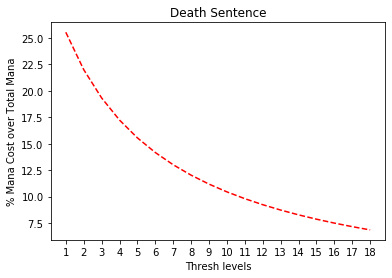

In [9]:
# % Mana Cost Based on Base Mana from Level 1 to 18
cost_usage_pct = plt.plot(
    range(1,19),
    [CHAMPION.stat_resource_cost_percentage(skill_q, level = lvl) * 100 for lvl in range(1,19)],
    'r--'
)

plt.figure(1)
plt.subplot(111)
plt.title(skill_q.ability_name)
plt.xticks(list(range(1,19)))
plt.xlabel(f'{CHAMPION.champion_name} levels')
plt.ylabel('% Mana Cost over Total Mana')
plt.show()

In [10]:
# Time required to recover Mana Cost via MP5 at Level 1
f"{skill_q.ability_cost / CHAMPION.base_stats['ResourceRegen_Thresh']:.3} seconds"

'11.7 seconds'

In [11]:
# Time required to recover Mana Cost via MP5 at Level 18
f"{skill_q.ability_cost / (CHAMPION.base_stats['ResourceRegen_Thresh'] + 17 * CHAMPION.base_stats['ResourceRegen_Thresh_lvl']):.3} seconds"

'3.57 seconds'